# Preprocessing (post split)

## Loading dataset

In [1]:
import pandas as pd

#INPUT AND OUTPUT LOCATION FOLDER 
location = '/Users/klaaskorteweg/Desktop/Master Thesis/'

#loading the splitted files 
train = 'train_data.xlsx'
test = 'test_data.xlsx'

train_df = pd.read_excel(location+train)
test_df = pd.read_excel(location+test)

In [2]:
train_df.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,attacktype1_txt,targtype1_txt,gname,...,weaptype2_txt,weapsubtype2_txt,weaptype3_txt,weapsubtype3_txt,weaptype4_txt,weapsubtype4_txt,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,1970,7.0,2.0,Dominican Republic,Central America & Caribbean,national,santo domingo,Assassination,Private Citizens & Property,MANO-D,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1,1970,NaN,NaN,Mexico,North America,federal,mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,1.0
2,1970,1.0,NaN,Philippines,Southeast Asia,tarlac,NaN,Assassination,Journalists & Media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
3,1970,1.0,NaN,Greece,Western Europe,attica,athens,Bombing/Explosion,Government (Diplomatic),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
4,1970,1.0,NaN,Japan,East Asia,fukouka,fukouka,Facility/Infrastructure Attack,Government (Diplomatic),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0


## Data Cleaning (Handling Missing Data and Handling Outliers)

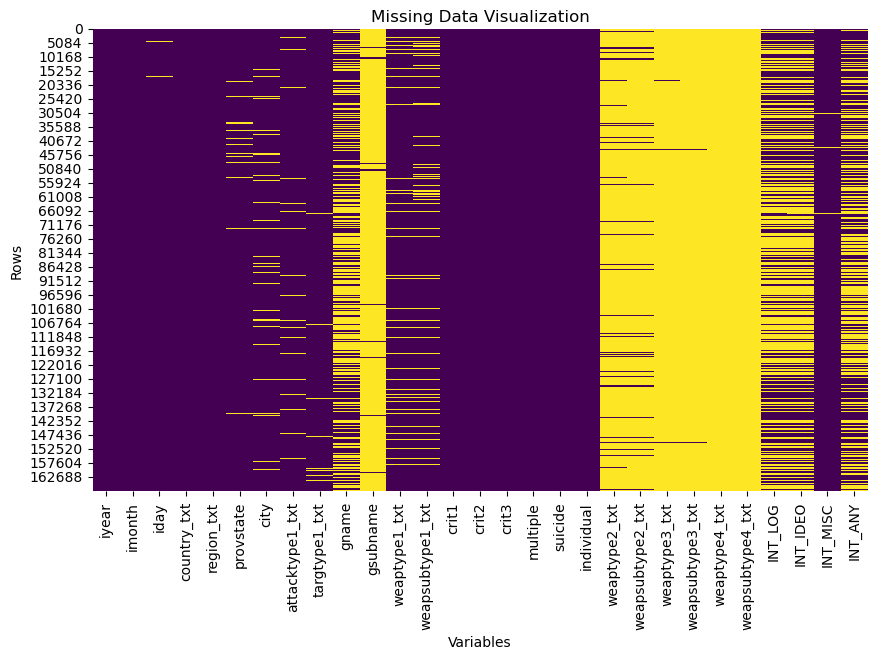

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

missing_data = train_df.isnull()

plt.figure(figsize=(10, 6))
sns.heatmap(missing_data, cmap='viridis', cbar=False)
plt.title('Missing Data Visualization')
plt.xlabel('Variables')
plt.ylabel('Rows')
plt.show()


In [4]:
print(train_df.columns)

Index(['iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'provstate',
       'city', 'attacktype1_txt', 'targtype1_txt', 'gname', 'gsubname',
       'weaptype1_txt', 'weapsubtype1_txt', 'crit1', 'crit2', 'crit3',
       'multiple', 'suicide', 'individual', 'weaptype2_txt',
       'weapsubtype2_txt', 'weaptype3_txt', 'weapsubtype3_txt',
       'weaptype4_txt', 'weapsubtype4_txt', 'INT_LOG', 'INT_IDEO', 'INT_MISC',
       'INT_ANY'],
      dtype='object')


### Data Cleaning: Handling Missing Data

In [5]:
import pandas as pd
import numpy as np

def replace_value(data,var,old_value,new_value):
    data[var].replace(old_value, new_value, inplace=True)

#iyear: no missing values

#imonth: mode imputation
mode_value = train_df['imonth'].mode().iloc[0]
replace_value(train_df,'imonth',np.nan,mode_value)
replace_value(test_df,'imonth',np.nan,mode_value)

#iday: mode imputation
mode_value = train_df['iday'].mode().iloc[0]
replace_value(train_df,'iday',np.nan,mode_value)
replace_value(test_df,'iday',np.nan,mode_value)

#country_txt: no missing values

#region_txt: no missing values

#provstate: "Unknown" imputation
replace_value(train_df,'provstate',np.nan,"Unknown")
replace_value(test_df,'provstate',np.nan,"Unknown")

#city: "Unknown" imputation
replace_value(train_df,'city',np.nan,"Unknown")
replace_value(test_df,'city',np.nan,"Unknown")

#attacktype1_txt: "Unknown" imputation
replace_value(train_df,'attacktype1_txt',np.nan,"Unknown")
replace_value(test_df,'attacktype1_txt',np.nan,"Unknown")

#targtype1_txt: list-wise deletion 
train_df.dropna(subset=['targtype1_txt'],inplace=True)
test_df.dropna(subset=['targtype1_txt'],inplace=True)

#gname: "Unknown" imputation
replace_value(train_df,'gname',np.nan,"Unknown")
replace_value(test_df,'gname',np.nan,"Unknown")

#gsubname: "Unknown" imputation
replace_value(train_df,'gsubname',np.nan,"Unknown")
replace_value(test_df,'gsubname',np.nan,"Unknown")

#weaptype1_txt: "Unknown imputation"
replace_value(train_df,'weaptype1_txt',np.nan,"Unknown")
replace_value(test_df,'weaptype1_txt',np.nan,"Unknown")

#weapsubtype1_txt: "Unknown imputation"
replace_value(train_df,'weapsubtype1_txt',np.nan,"Unknown")
replace_value(test_df,'weapsubtype1_txt',np.nan,"Unknown")

#multiple: mode imputation
mode_value = train_df['multiple'].mode().iloc[0]
replace_value(train_df,'multiple',np.nan,mode_value)
replace_value(test_df,'multiple',np.nan,mode_value)

#INT_MISC: mode imputation
mode_value = train_df['INT_MISC'].mode().iloc[0]
replace_value(train_df,'INT_MISC',np.nan,mode_value)
replace_value(test_df,'INT_MISC',np.nan,mode_value)


In [6]:
#dropping variables based on high missing variables: 
variables_dropped = ['weaptype2_txt',
       'weapsubtype2_txt', 'weaptype3_txt', 'weapsubtype3_txt',
       'weaptype4_txt', 'weapsubtype4_txt', 'INT_LOG', 'INT_IDEO',
       'INT_ANY']
train_df.drop(variables_dropped, axis=1, inplace=True)
test_df.drop(variables_dropped, axis=1, inplace=True)

In [7]:
def calculate_nan_percentage(data):
    # Calculate the total number of rows
    total_rows = len(data)
    
    # Calculate the percentage of NaN values for each column
    nan_percentage = (data.isnull().sum() / total_rows) * 100
    
    return nan_percentage

print(calculate_nan_percentage(test_df))

iyear               0.0
imonth              0.0
iday                0.0
country_txt         0.0
region_txt          0.0
provstate           0.0
city                0.0
attacktype1_txt     0.0
targtype1_txt       0.0
gname               0.0
gsubname            0.0
weaptype1_txt       0.0
weapsubtype1_txt    0.0
crit1               0.0
crit2               0.0
crit3               0.0
multiple            0.0
suicide             0.0
individual          0.0
INT_MISC            0.0
dtype: float64


## Preprocessing: Feature Creation

### iyear, imonth, iday
created features: date, weekday, quarter, weekend

In [8]:
import numpy as np

#Create 'date' feature: 

def create_feature_date(data):
    data['imonth'] = data['imonth'].fillna(0)
    data['iday'] = data['iday'].fillna(0)
    data['imonth'] = data['imonth'].astype(int)
    data['iday'] = data['iday'].astype(int)
    data['imonth'] = data['imonth'].astype(str)
    data['iday'] = data['iday'].astype(str)
    data['imonth'] = data['imonth'].replace('0', np.nan)
    data['iday'] = data['iday'].replace('0', np.nan)
    data['date'] = pd.to_datetime(data[['iyear', 'imonth', 'iday']].astype(str).agg('-'.join, axis=1),errors='coerce')

create_feature_date(train_df)
create_feature_date(test_df)


In [9]:
#Create 'weekday' feature:

def create_feature_weekday(data):
    data['weekday'] = data['date'].dt.day_name()

create_feature_weekday(train_df)
create_feature_weekday(test_df)

In [10]:
#Create 'quarter' feature:

def create_feature_quarter(data):
    month_to_quarter = {1: 'Q1', 2: 'Q1', 3: 'Q1',
                        4: 'Q2', 5: 'Q2', 6: 'Q2',
                        7: 'Q3', 8: 'Q3', 9: 'Q3',
                        10: 'Q4', 11: 'Q4', 12: 'Q4'}
    
    data['imonth'] = data['imonth'].fillna(0)
    data['imonth'] = data['imonth'].astype(int)
    data['quarter'] = data['imonth'].map(month_to_quarter)
    data['imonth'] = data['imonth'].astype(str)
    data['imonth'] = data['imonth'].replace('0', np.nan)
    

create_feature_quarter(train_df)
create_feature_quarter(test_df)

In [11]:
#create 'weekend' feature (indicator if weekend or not):

def create_feature_weekend(data):
    weekend_days = ['Saturday','Sunday']
    #binary inidicator (1 = weekend, 0 = weekday)
    data['weekend'] = data['weekday'].isin(weekend_days).astype(int)

create_feature_weekend(train_df)
create_feature_weekend(test_df)

In [12]:
train_df

,iyear,imonth,iday,country_txt,region_txt,provstate,city,attacktype1_txt,targtype1_txt,gname,...,crit2,crit3,multiple,suicide,individual,INT_MISC,date,weekday,quarter,weekend
0,1970,7,2,Dominican Republic,Central America & Caribbean,national,santo domingo,Assassination,Private Citizens & Property,MANO-D,...,1,1,0,0,0,0.0,1970-07-02,Thursday,Q3,0
1,1970,5,15,Mexico,North America,federal,mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,...,1,1,0,0,0,1.0,1970-05-15,Friday,Q2,0
2,1970,1,15,Philippines,Southeast Asia,tarlac,Unknown,Assassination,Journalists & Media,Unknown,...,1,1,0,0,0,1.0,1970-01-15,Thursday,Q1,0
3,1970,1,15,Greece,Western Europe,attica,athens,Bombing/Explosion,Government (Diplomatic),Unknown,...,1,1,0,0,0,1.0,1970-01-15,Thursday,Q1,0
4,1970,1,15,Japan,East Asia,fukouka,fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,...,1,1,0,0,0,1.0,1970-01-15,Thursday,Q1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167759,2016,9,21,Iraq,Middle East & North Africa,saladin,dawr district,Bombing/Explosion,Private Citizens & Property,Islamic State of Iraq and the Levant (ISIL),...,1,1,0,0,0,0.0,2016-09-21,Wednesday,Q3,0
167760,2016,9,21,Iraq,Middle East & North Africa,saladin,dawr district,Bombing/Explosion,Private Citizens & Property,Islamic State of Iraq and the Levant (ISIL),...,1,1,0,0,0,0.0,2016-09-21,Wednesday,Q3,0
167761,2016,9,21,Iraq,Middle East & North Africa,saladin,dawr district,Bombing/Explosion,Private Citizens & Property,Islamic State of Iraq and the Levant (ISIL),...,1,1,0,0,0,0.0,2016-09-21,Wednesday,Q3,0
167762,2016,9,21,Iraq,Middle East & North Africa,saladin,dawr district,Bombing/Explosion,Private Citizens & Property,Islamic State of Iraq and the Levant (ISIL),...,1,1,0,0,0,0.0,2016-09-21,Wednesday,Q3,0


## Categorical Variable Grouping

### Target variable

In [13]:
train_df.targtype1_txt.unique()

array(['Private Citizens & Property', 'Government (Diplomatic)',
       'Journalists & Media', 'Police', 'Utilities', 'Military',
       'Government (General)', 'Airports & Aircraft', 'Business',
       'Educational Institution', 'Violent Political Party',
       'Religious Figures/Institutions', 'Transportation', 'Tourists',
       'NGO', 'Telecommunication', 'Food or Water Supply',
       'Terrorists/Non-State Militia', 'Other', 'Maritime',
       'Abortion Related'], dtype=object)

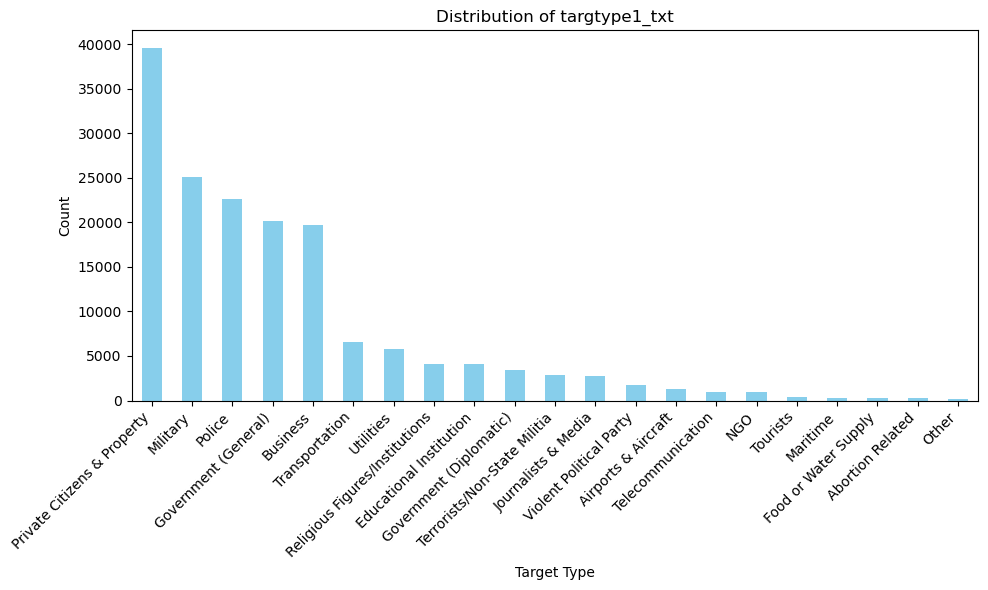

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

category_counts = train_df['targtype1_txt'].value_counts()


plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')


plt.title('Distribution of targtype1_txt')
plt.xlabel('Target Type')
plt.ylabel('Count')


plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [15]:
specified_categories = ['Private Citizens & Property', 'Government (General)', 'Military', 'Police', 'Business']
train_df['targtype1_txt'] = train_df['targtype1_txt'].apply(lambda x: x if x in specified_categories else 'Other')
test_df['targtype1_txt'] = test_df['targtype1_txt'].apply(lambda x: x if x in specified_categories else 'Other')

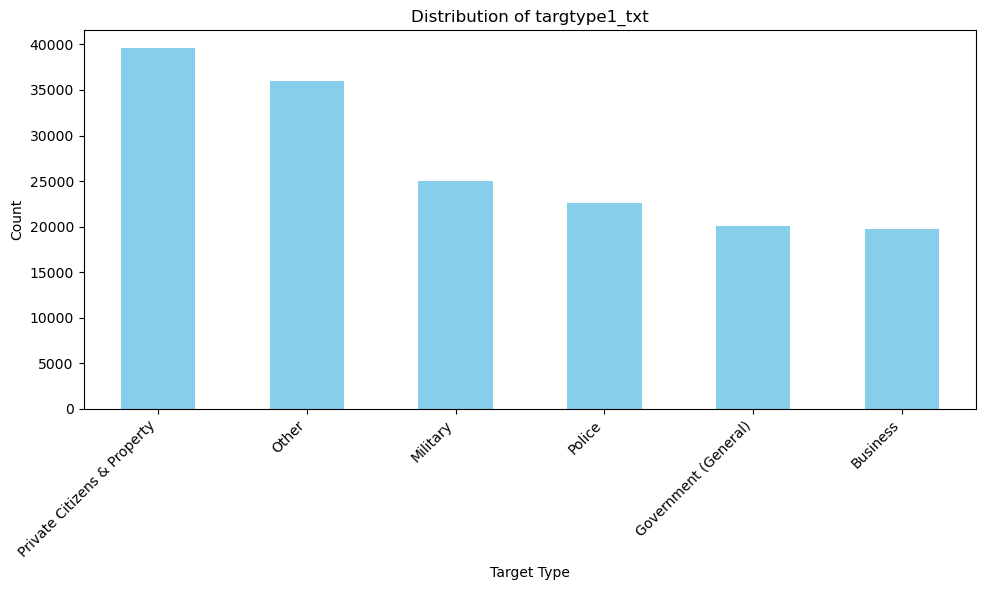

In [16]:
category_counts = train_df['targtype1_txt'].value_counts()


plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')


plt.title('Distribution of targtype1_txt')
plt.xlabel('Target Type')
plt.ylabel('Count')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

### city and provstate

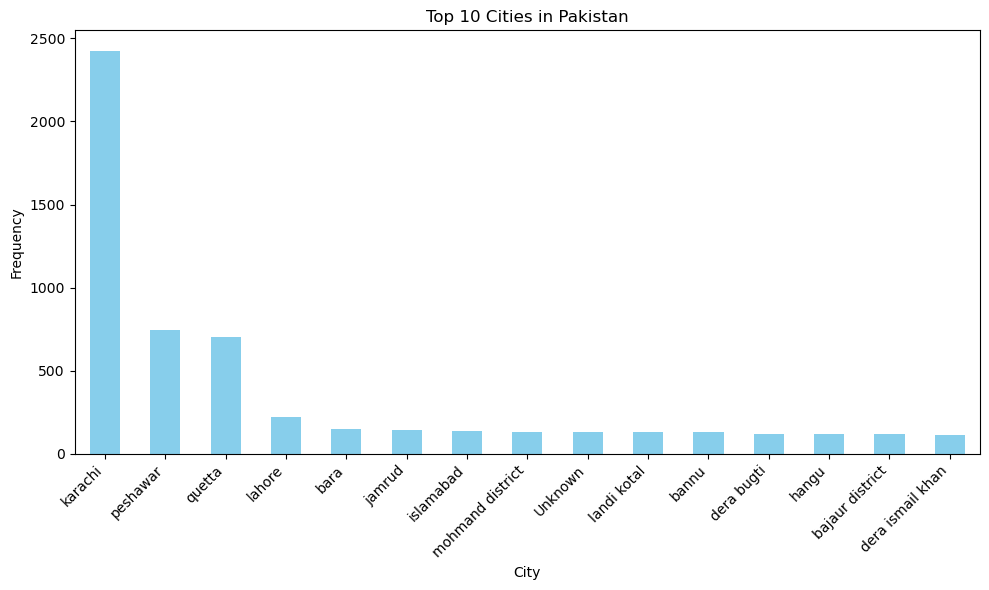

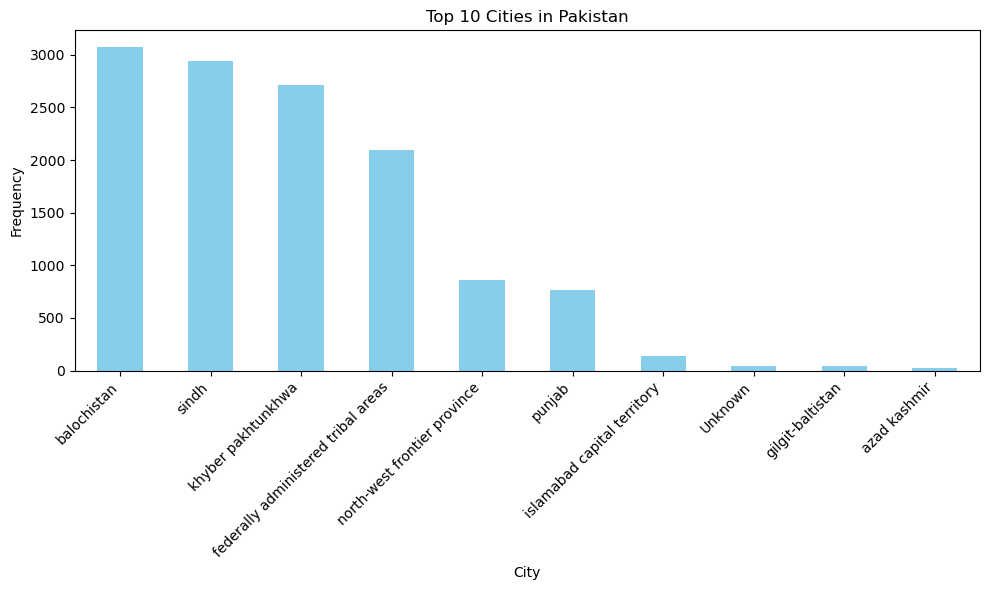

In [17]:

def plot_top_cities(data, country_column, city_column, country,top_nr=10):

    country_data = data[data[country_column] == country]
    

    top_cities = country_data[city_column].value_counts().head(top_nr)
    

    plt.figure(figsize=(10, 6))
    top_cities.plot(kind='bar', color='skyblue')
    plt.title(f'Top 10 Cities in {country}')
    plt.xlabel('City')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

plot_top_cities(train_df, 'country_txt','city','Pakistan',top_nr=15)
plot_top_cities(train_df, 'country_txt','provstate','Pakistan',top_nr=15)

In [18]:
def group_top_categories(training_df, testing_df, country_column, variable_column, top_n):

    top_categories_train = training_df.groupby(country_column)[variable_column].value_counts().groupby(level=0).nlargest(top_n).reset_index(level=0, drop=True)
    

    top_categories_train = [(country, category) for (country, category) in top_categories_train.index]
    

    training_df[variable_column] = training_df.apply(lambda row: row[variable_column] if (row[country_column], row[variable_column]) in top_categories_train else 'Other', axis=1)
    

    testing_df[variable_column] = testing_df.apply(lambda row: row[variable_column] if (row[country_column], row[variable_column]) in top_categories_train else 'Other', axis=1)
    
    return training_df, testing_df 


group_top_categories(train_df, test_df, 'country_txt', 'city', 10)
group_top_categories(train_df, test_df, 'country_txt', 'provstate', 5)


(        iyear imonth iday         country_txt                   region_txt  \
 0        1970      7    2  Dominican Republic  Central America & Caribbean   
 1        1970      5   15              Mexico                North America   
 2        1970      1   15         Philippines               Southeast Asia   
 3        1970      1   15              Greece               Western Europe   
 4        1970      1   15               Japan                    East Asia   
 ...       ...    ...  ...                 ...                          ...   
 167759   2016      9   21                Iraq   Middle East & North Africa   
 167760   2016      9   21                Iraq   Middle East & North Africa   
 167761   2016      9   21                Iraq   Middle East & North Africa   
 167762   2016      9   21                Iraq   Middle East & North Africa   
 167763   2016      9   21                Iraq   Middle East & North Africa   
 
        provstate           city                 a

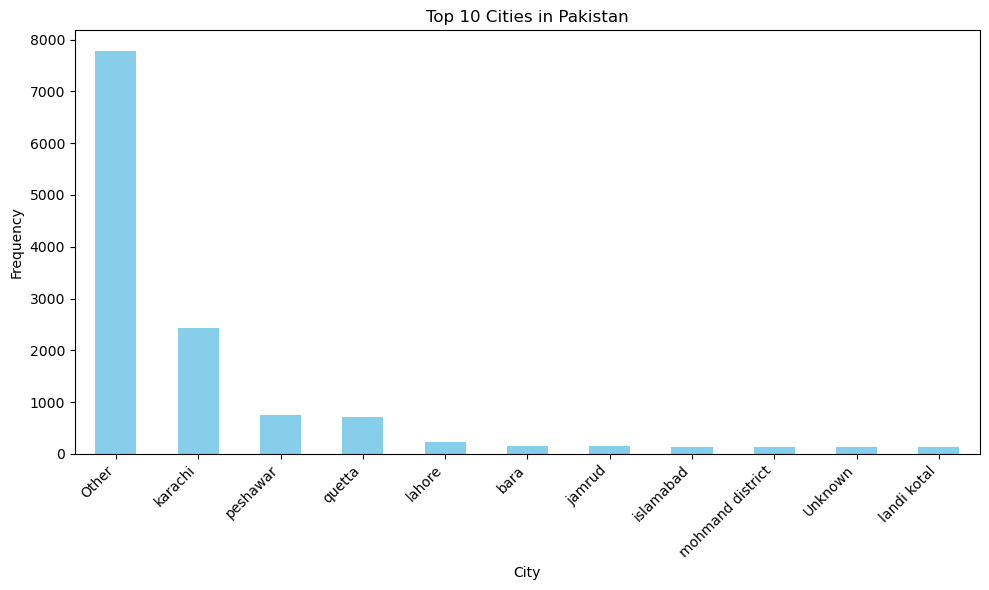

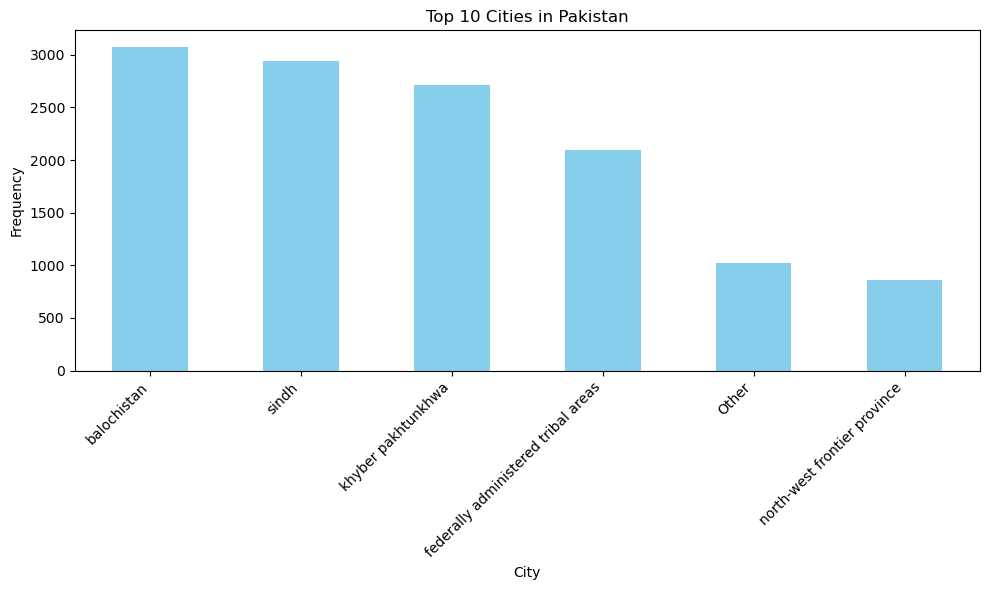

In [19]:
plot_top_cities(train_df, 'country_txt','city','Pakistan',top_nr=15)
plot_top_cities(train_df, 'country_txt','provstate','Pakistan',top_nr=15)

In [20]:
print(train_df.city.nunique()) #should be less than 2041 (or less if a country does not have enough cities)
print(train_df.provstate.nunique()) #should be less than 1021 (or less if a country does not have enough provstates)

1391
728


### gname and gsubname

In [21]:
def group_top_categories(training_df, testing_df, variable_column, top_n):
    top_categories_train = training_df[variable_column].value_counts().nlargest(top_n).index
    
    training_df[variable_column] = training_df[variable_column].apply(lambda x: x if x in top_categories_train else 'Other')
    testing_df[variable_column] = testing_df[variable_column].apply(lambda x: x if x in top_categories_train else 'Other')
    
    return training_df, testing_df

group_top_categories(train_df, test_df, 'gname', 200)
group_top_categories(train_df, test_df, 'gsubname', 100)


(        iyear imonth iday         country_txt                   region_txt  \
 0        1970      7    2  Dominican Republic  Central America & Caribbean   
 1        1970      5   15              Mexico                North America   
 2        1970      1   15         Philippines               Southeast Asia   
 3        1970      1   15              Greece               Western Europe   
 4        1970      1   15               Japan                    East Asia   
 ...       ...    ...  ...                 ...                          ...   
 167759   2016      9   21                Iraq   Middle East & North Africa   
 167760   2016      9   21                Iraq   Middle East & North Africa   
 167761   2016      9   21                Iraq   Middle East & North Africa   
 167762   2016      9   21                Iraq   Middle East & North Africa   
 167763   2016      9   21                Iraq   Middle East & North Africa   
 
        provstate           city                 a

In [22]:
print(train_df.gname.nunique()) #should be 201
print(train_df.gsubname.nunique()) #should be 101

201
101


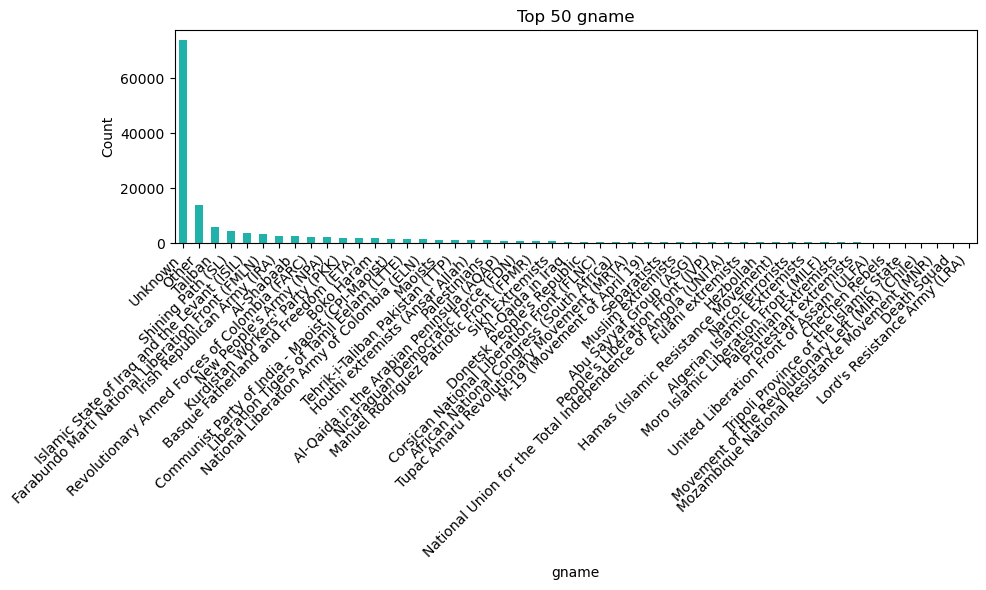

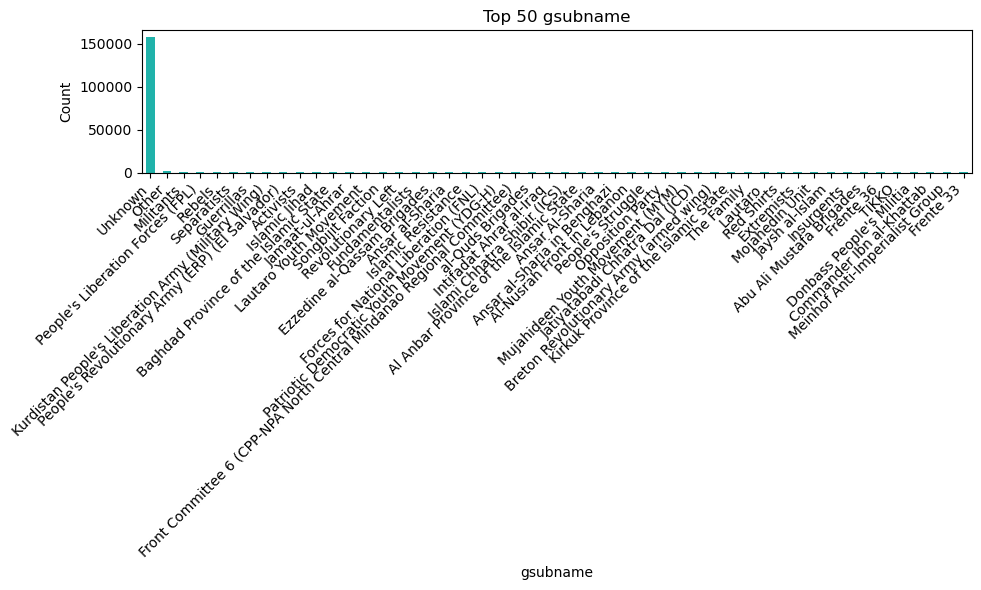

In [23]:
import matplotlib.pyplot as plt

#FREQUENCY DISTRIBUTION: BARPLOT
#barplot with built in function to request the top n in a variable:

def barplot(dataset,var,color='lightseagreen', top_n = None):

    variable_count = dataset[var].value_counts()

    if top_n is not None: 
        variable_count = variable_count.head(top_n)

    plt.figure(figsize=(10, 6))
    variable_count.plot(kind='bar', color=color)
    plt.title(f'{"Top " + str(top_n) if top_n is not None else "Count of"} {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


barplot(train_df,'gname',top_n=50)
barplot(train_df,'gsubname',top_n=50)


## Saving dataset(s)

In [24]:
def save_data(data, doc_location,doc_title):
    data.to_excel((doc_location+doc_title),index=False)

save_data(train_df,location,'train_data_processed.xlsx')
save_data(test_df,location,'test_data_processed.xlsx')

In [25]:
def variable_summary_table(df):

    columns = []
    dtypes = []
    unique_counts = []
    example_values = []


    for column in df.columns:

        columns.append(column)
        

        dtype = df[column].dtype
        dtypes.append(dtype)
        

        unique_count = df[column].nunique()
        unique_counts.append(unique_count)

        unique_values = df[column].unique()
        example = unique_values[:min(3, len(unique_values))]  
        example_values.append(example)
    

    summary_df = pd.DataFrame({
        'Variable': columns,
        'Dtype': dtypes,
        'Unique Values': unique_counts,
        'Example Values': example_values
    })
    
    return summary_df


summary_table = variable_summary_table(train_df)
summary_table


,Variable,Dtype,Unique Values,Example Values
0,iyear,int64,46,"[1970, 1971, 1972]"
1,imonth,object,12,"[7, 5, 1]"
2,iday,object,31,"[2, 15, 1]"
3,country_txt,object,204,"[Dominican Republic, Mexico, Philippines]"
4,region_txt,object,12,"[Central America & Caribbean, North America, S..."
5,provstate,object,728,"[national, federal, Other]"
6,city,object,1391,"[santo domingo, mexico city, Unknown]"
7,attacktype1_txt,object,9,"[Assassination, Hostage Taking (Kidnapping), B..."
8,targtype1_txt,object,6,"[Private Citizens & Property, Other, Police]"
9,gname,object,201,"[Other, Unknown, Black Nationalists]"
